In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
def definitions(N, Tmax):  
  # N is the total number of spins
  # Tmax is the total number of evolutions

    x = np.zeros((N, Tmax))   #the value of the voltages
    f = np.zeros((N, Tmax))   #the function f
    g = np.random.normal(0, 0.02, size=(N, Tmax)) #gaussian noise

  # all the above three arrays have been defined such that 
  # the second dimension corresponds to different number of evolutions
  # the first dimension includes different spins 

    h = 0
  # h is the uniform external magnetic field to be used in the Hamiltonian

    J = np.zeros((N, N))
    for i in range(N):
        J[i, i] = h/2
        if i > 0: 
            J[i, i-1] = -1  
    J = J + np.transpose(J)

  # ensuring that J is symmetric

  # the coupling matrix J is now a tridiagonal matrix after assuming that only 
  # the nearest neighbour interactions are significant

    return x, f, g, J

def voltage(alpha, beta, N, Tmax, x, f, g, J):  
    for k in range(Tmax-1):
        for n in range(N):
            sum1 = 0
            if beta != 0:
                for j in range(N):
                    sum1 += J[j, n]*x[j, k]
            f[n, k] = alpha*x[n, k] + beta*sum1                              #equation 3.2 in the paper with beta=0
            x[n, k+1] = (np.cos(f[n, k] + g[n, k] - np.pi/4))**2 - 0.5       #equation 3.1 in the paper
    return x

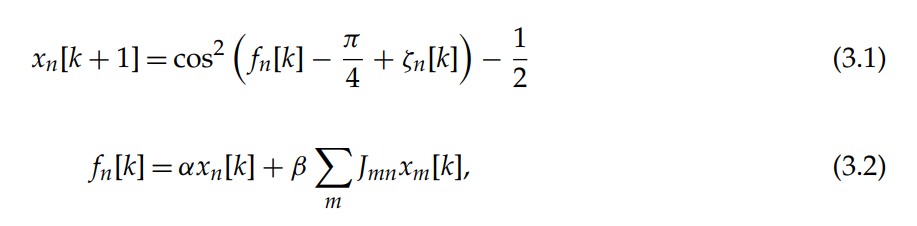

Bifurcation Plot

In [29]:
N_bif = 60
Tmax_bif = 50
alpha_bif = np.arange(0, 2.5, 0.1)
x_bif = np.zeros((len(alpha_bif), N_bif, Tmax_bif))
f_bif = np.zeros((len(alpha_bif), N_bif, Tmax_bif))
g_bif = np.random.normal(0, 0.02, size=(len(alpha_bif), N_bif, Tmax_bif))

def bif_plot(alpha_bif, x_bif, f_bif, g_bif, N_bif, Tmax_bif):
    for i in range(len(alpha_bif)):
        for n in range(N_bif):
            for k in range(Tmax_bif-1):
                f_bif[i, n, k] = alpha_bif[i]*x_bif[i, n, k]
                x_bif[i, n, k+1] = (np.cos(f_bif[i, n, k] + g_bif[i, n, k] - np.pi/4))**2 - 0.5
    return x_bif

# I have just passed a range of values for the parameter alpha to calculate the final
# voltages and obtain the bifurcation plot.
x_bif = bif_plot(alpha_bif, x_bif, f_bif, g_bif, N_bif, Tmax_bif)
plt.title("Bifurcation Plot")
plt.xlabel("alpha")
plt.ylabel("Voltages")
for i in range(N_bif):
    plt.scatter(alpha_bif, x_bif[:, i , -1]) 

We see that the bifurcation point is around $\alpha_{bif} = 1$

In [30]:
beta_test = 0.2
N = 50
Tmax = 50
for alpha_test in np.arange(1, 2.5, 0.1):
    x, f, g, J = definitions(N, Tmax)
    x = voltage(alpha_test, beta_test, N, Tmax, x, f, g, J)
    plt.title("alpha={}, beta={}".format(np.round(alpha_test, 1), beta_test))
    plt.xlabel("n-th spin")
    plt.ylabel("Voltages")
    plt.scatter(range(N), x[:, -1])
    plt.show()

In [49]:
alpha = 1.2
beta = 0.2
N = 50
Tmax = 50
x, f, g, J = definitions(N, Tmax)

x = voltage(alpha, beta, N, Tmax, x, f, g, J)
# I have just implemented the equations in this cell for particular values of gains
# to visualize the voltages for an inhomogeneous case.

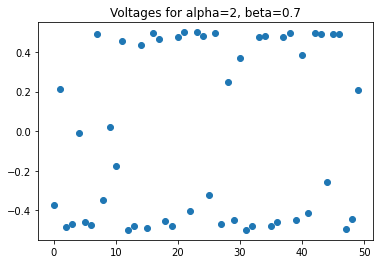

In [39]:
plt.title("Voltages for alpha={}, beta={}".format(alpha, beta))
plt.scatter(range(N), x[:, -1])
plt.show()

In [50]:
N = 50
Tmax = 50
error = np.zeros((20, 10))
for k in range(5):  
    alpha = 0
    beta = 0
    flag = 0
    for p in range(20):
        alpha = p*3/20
        for q in range(10):
            beta = q*2/10
            x, f, g, J = definitions(N, Tmax)
            x = voltage(alpha, beta, N, Tmax, x, f, g, J)
            if np.min(abs(x[:,-1])) > 0.05:  
                                        # this condition would mean that there is no distinction between homogeneous and inhomogeneous amplitudes
                                        # if we want to only see the plot for homogeneous amplitudes, we simply change the inequality to >0.4 
                                        # which would eliminate all inhomogeneous amplitudes.
                for i in range(N):
                    if x[i, -1] > 0: 
                        if flag == 1:
                            error[p, q] += 1
                        flag = 1
                    else: 
                        if flag == -1:
                            error[p, q] += 1
                        flag = -1
            else: error[p,q] = 50000  # a high value is chosen so that we can identify it an inhomogeneous set of amplitudes
                                    # by appropriately choosing the saturation limits in the heatmap
    error /=0.05*N

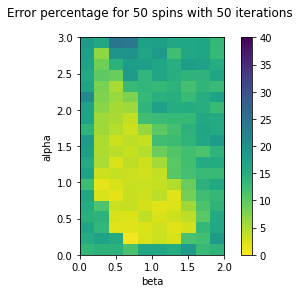

In [51]:
plt.title("Error percentage for 50 spins with 50 iterations \n")
plt.xlabel("beta")
plt.ylabel("alpha")
plt.imshow(error, origin='lower', cmap='viridis_r',
           vmin=0, vmax=40,
           extent=[0,2,0,3])
plt.colorbar()

In [56]:
np.unravel_index(np.argmin(error, axis=None), error.shape)

(1, 3)

In [ ]:
N = 50
Tmax = 50
error = np.zeros((20, 10))
for k in range(5):  
    alpha = 0
    beta = 0
    flag = 0
    for p in range(20):
        alpha = p*3/20
        for q in range(10):
            beta = q*2/10
            x, f, g, J = definitions(N, Tmax)
            x = voltage(alpha, beta, N, Tmax, x, f, g, J)
            if np.min(abs(x[:,-1])) > 0.05:  
                                        # this condition would mean that there is no distinction between homogeneous and inhomogeneous amplitudes
                                        # if we want to only see the plot for homogeneous amplitudes, we simply change the inequality to >0.4 
                                        # which would eliminate all inhomogeneous amplitudes.
                for i in range(N):
                    if x[i, -1] > 0: 
                        if flag == 1:
                            error[p, q] += 1
                        flag = 1
                    else: 
                        if flag == -1:
                            error[p, q] += 1
                        flag = -1
            else: error[p,q] = 50000  # a high value is chosen so that we can identify it an inhomogeneous set of amplitudes
                                    # by appropriately choosing the saturation limits in the heatmap
    error /=0.05*N